In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs

from sklearn.metrics.cluster import contingency_matrix
from scipy.special import comb
import matplotlib.pyplot as plt

import pylab as pl
from sklearn.decomposition import PCA

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
def plotcluster(X, y, plot_name):
    # dimension reduction with PCA
    pca = PCA(n_components=2).fit(X)
    pca_2d = pca.transform(X)
    
    pl.title(plot_name)
    pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
    pl.show()

In [3]:
def Kmeansclustering(X, num_of_clusters):
    # Please refer to the page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    # Inputs: X is a N * M data matrix, where N denotes the number of data points, and M is the number of features
    #         num_of_clusters means the number of clusters
    # Output: the predicted labels for X, which is a vector with length N
    
    # IMPLEMENT THIS METHOD USING sklearn.cluster.KMeans
    kmeans = KMeans(n_clusters = num_of_clusters)
    y_pred = kmeans.fit_predict(X)

    return y_pred

In [4]:
def Hierarchicalclustering(X, num_of_clusters):
    # Please refer to the page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
    # Inputs: X is a N * M data matrix, where N denotes the number of data points, and M is the number of features
    #         num_of_clusters means the number of clusters
    # Output: the predicted labels for X, which is a vector with length N
    
    # IMPLEMENT THIS METHOD USING sklearn.cluster.AgglomerativeClustering
    aggclus = AgglomerativeClustering(n_clusters = num_of_clusters)
    y_pred = aggclus.fit_predict(X)
    
    return y_pred

In [5]:
def Densitybasedclustering(X, eps_value, min_samples_value):
    # Please refer to the page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
    # Inputs: X is a N * M data matrix, where N denotes the number of data points, and M is the number of features
    #         eps_value and min_samples_value are two parameters in DBSCAN
    # Output: the predicted labels for X, which is a vector with length N
    
    # IMPLEMENT THIS METHOD USING sklearn.cluster.DBSCAN
    dbscan = DBSCAN(eps = eps_value, min_samples = min_samples_value)
    y_pred = dbscan.fit_predict(X)
    
    return y_pred

In [6]:
def clustering_metrics(y_true, y_pred):
    
    # obtain contingency matrix: P * C
    # P is the number of ground truth clusters
    # C is the number of clusters produced by the alogrithm
    cm = contingency_matrix(y_true, y_pred)
    
    # Please refer to the page: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html
    # We can use the comb function to calculate “N choose k”
    #
    # Example:
    # from scipy.special import comb
    # N = np.array([4, 5])
    # result = comb(N, 2)
    # print(result)
    #
    # Outputs:
    # [ 6. 10.]
    
    # You may also use the following functions: 
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html
    
    # For rand index and F1
    # step 1: tp + fp
    tp_plus_fp = np.sum(comb(np.sum(cm,axis=0),2))
    
    # step 2: tp + fn
    tp_plus_fn = np.sum(comb(np.sum(cm,axis=1),2))
    
    # step 3: tp
    tp = np.sum(comb(cm,2))
    
    # step 4: fp, fn, tn
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(np.sum(cm),2) - tp - fp - fn
    
    # rand index
    rand_index = (tp + tn) / (tp + fp + fn + tn)
    # F1
    F1 = 2 * tp / (2 * tp + fp + fn)
    
    #-------------------
    # For purity  
    numerator = np.sum(cm.max(axis=0))
    denominator = np.sum(cm)
    purity = numerator / denominator
    
    return rand_index, F1, purity

In [8]:
data = pd.read_csv('train_data.csv', sep=",")

In [13]:
data

,Name,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,SBFG,4.520300e+07,0.051400,0.000000e+00,4.520300e+07,0.000000e+00,2.754700e+07,3.157800e+07,1.362500e+07,0.000000e+00,...,0.205100,0.000000,0.000000,0.074300,0.100800,-0.072900,0.000000,0.009600,Financial Services,0
1,FOMX,3.669000e+06,-0.336200,1.300000e+04,3.656000e+06,5.777900e+07,1.149100e+07,6.927000e+07,-6.561400e+07,0.000000e+00,...,0.000000,-0.692200,0.000000,-0.408300,-0.544600,-1.000000,1.231100,0.246200,Healthcare,0
2,VIA,1.326300e+10,1.169073,7.436000e+09,5.827000e+09,1.161536e+08,3.005000e+09,3.228000e+09,2.599000e+09,1.082823e+08,...,0.004648,7.361843,0.106999,1.401431,0.268703,1.627347,0.423634,0.941875,Consumer Cyclical,0
3,ABM,5.453600e+09,0.060000,4.881200e+09,5.724000e+08,0.000000e+00,4.366000e+08,4.706000e+08,1.018000e+08,1.920000e+07,...,0.031300,0.291700,0.000000,0.673100,0.378200,3.391400,0.000000,0.064600,Industrials,0
4,THS,6.307100e+09,0.021400,5.226700e+09,1.080400e+09,0.000000e+00,7.007000e+08,1.493200e+09,-4.128000e+08,1.268000e+08,...,0.000000,-0.231200,-0.061000,-0.117100,-0.118100,-0.087900,0.000000,-0.059200,Consumer Defensive,1
5,UUUU,3.104600e+07,-0.430900,2.271000e+07,8.336000e+06,0.000000e+00,1.492300e+07,3.422500e+07,-2.588900e+07,2.101000e+06,...,0.000000,2.442300,-0.012600,-0.056600,-0.154000,-0.069800,0.000000,-0.038400,Basic Materials,1
6,JMU,8.873655e+07,0.212200,8.818778e+07,5.487680e+05,0.000000e+00,2.190326e+07,1.689217e+08,-1.683729e+08,4.111640e+05,...,0.000000,0.773800,1.403100,-0.503200,-0.583700,0.000000,0.000000,-0.216000,Consumer Cyclical,0
7,CBH,5.361782e+09,1.169073,3.389896e+09,2.059012e+09,1.161536e+08,8.710404e+08,1.411698e+09,6.233607e+08,1.082823e+08,...,0.004648,7.361843,0.106999,1.401431,0.268703,1.627347,0.423634,0.941875,Financial Services,0
8,PUB,9.228200e+07,0.104000,0.000000e+00,9.228200e+07,0.000000e+00,4.339800e+07,5.595900e+07,3.632300e+07,0.000000e+00,...,0.000000,0.000000,0.000000,0.274600,0.108500,11.503900,0.000000,0.094600,Financial Services,1
9,CC,6.183000e+09,0.145000,4.438000e+09,1.745000e+09,8.100000e+07,6.260000e+08,7.640000e+08,9.810000e+08,2.140000e+08,...,0.000000,0.138800,0.219000,0.203500,7.445500,0.160300,0.000000,-0.338300,Basic Materials,0


In [12]:
data = data.fillna(data.mean())

In [16]:
data['Sector_fac'] = pd.factorize(data['Sector'])[0]

In [17]:
pd.factorize(data['Sector'])[0]

array([0, 1, 2, ..., 6, 3, 6])

In [18]:
sector_index = pd.factorize(data['Sector'])[1]

In [19]:
sector_dict = {k: v for v, k in enumerate(sector_index)}

In [20]:
data0 = data[data['Class'] == 0]

In [21]:
data1 = data[data['Class'] == 1]

In [22]:
new_data0 = data0.sample(n = data1.shape[0], replace = True)

In [23]:
new_data = pd.concat([new_data0, data1], axis = 0)

In [25]:
new_data = new_data.drop('Sector', 1)

In [26]:
X = new_data.values[:, 1:]
print(X)

[[3763749000.0 0.0264 2914327000.0 ... 0.0354 0 5]
 [8187600000.0 0.0911 5751500000.0 ... 0.0434 0 5]
 [709598000.0 0.2408 586809000.0 ... 0.1483 0 5]
 ...
 [385961000.0 -0.0962 169382000.0 ... -0.08 1 7]
 [565153000.0 0.1783 321780000.0 ... 0.2147 1 5]
 [24137913.0 0.2086 6307800.0 ... 0.2248 1 7]]


In [32]:
Y = new_data.values[:, -1].astype('int')

In [29]:
X.shape

(1922, 223)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

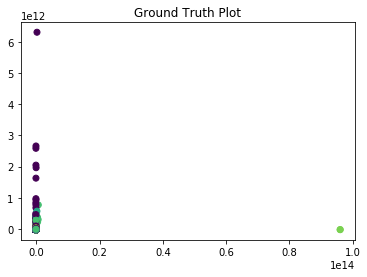

In [34]:
X = X_train
y = y_train

plotcluster(X, y, 'Ground Truth Plot')

Kmeans: K = 4
Rand index = 0.14322916666666666
F1 = 0.23917645518845568
Purity = 0.23292127521145087


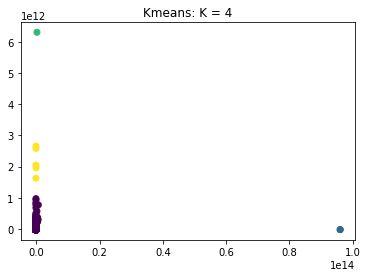

Kmeans: K = 5
Rand index = 0.16370499891563653
F1 = 0.23661609795554758
Purity = 0.23292127521145087


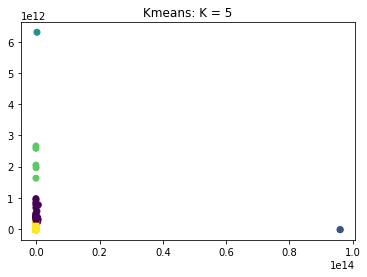

Kmeans: K = 6
Rand index = 0.16089751409672523
F1 = 0.2366342204033818
Purity = 0.23552374756018218


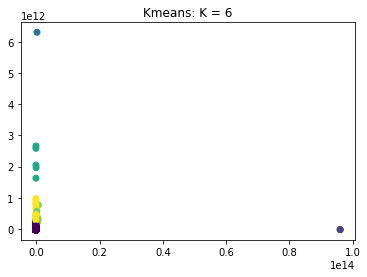

Kmeans: K = 7
Rand index = 0.16547894979397093
F1 = 0.23552547234384677
Purity = 0.23552374756018218


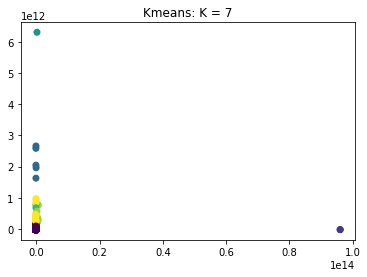

In [35]:
#Perform K-means clustering and evaluate performance

for num_of_clusters in range(4, 8):
    # Kmeans
    y_pred = Kmeansclustering(X, num_of_clusters)
    
    # evaluation metrics
    rand_index, F1, purity = clustering_metrics(y, y_pred)
    print('Kmeans: K =', num_of_clusters)
    print('Rand index =', rand_index)
    print('F1 =', F1)
    print('Purity =', purity)

    plotcluster(X, y_pred, 'Kmeans: K = ' + str(num_of_clusters))

Hierarchical clustering: K = 4
Rand index = 0.14322916666666666
F1 = 0.23917645518845568
Purity = 0.23292127521145087


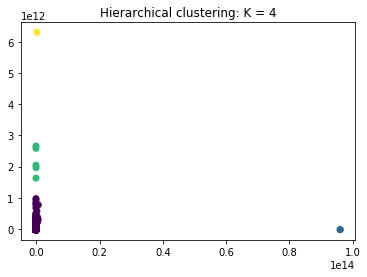

Hierarchical clustering: K = 5
Rand index = 0.1936707059206246
F1 = 0.2357283836020344
Purity = 0.23292127521145087


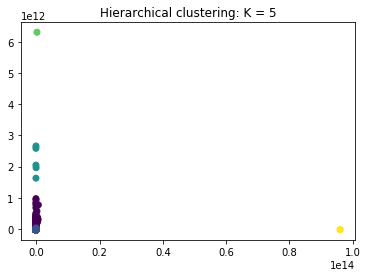

Hierarchical clustering: K = 6
Rand index = 0.19385369225764476
F1 = 0.23574226938256257
Purity = 0.23552374756018218


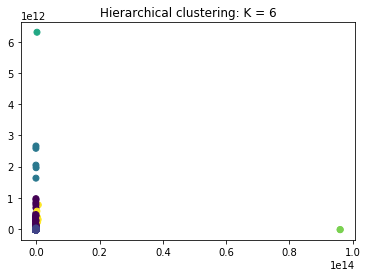

Hierarchical clustering: K = 7
Rand index = 0.19386724680112774
F1 = 0.2356937351708495
Purity = 0.23552374756018218


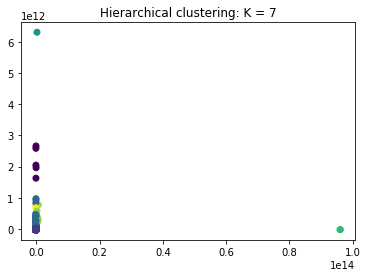

In [37]:
#Perform Hierarchical clustering and evaluate performance

for num_of_clusters in range(4, 8):
    # Hierarchical clustering
    y_pred = Hierarchicalclustering(X, num_of_clusters)
    
    # evaluation metrics
    rand_index, F1, purity = clustering_metrics(y, y_pred)
    print('Hierarchical clustering: K =', num_of_clusters)
    print('Rand index =', rand_index)
    print('F1 =', F1)
    print('Purity =', purity)

    plotcluster(X, y_pred, 'Hierarchical clustering: K = ' + str(num_of_clusters))

Density-based Clustering: eps = 3, min_samples = 3
Rand index = 0.500467365815529
Clustering F1 = 0.4095010212115554
Clustering Purity = 0.5390625


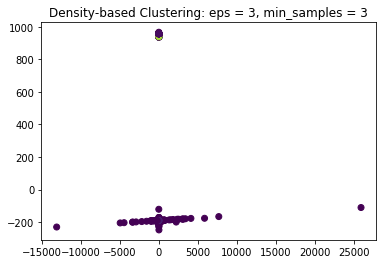

Density-based Clustering: eps = 3, min_samples = 4
Rand index = 0.5000363687684558
Clustering F1 = 0.4275472526024591
Clustering Purity = 0.5197916666666667


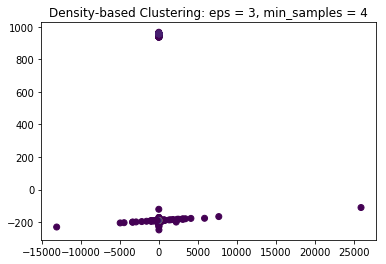

Density-based Clustering: eps = 3, min_samples = 5
Rand index = 0.5000336546812576
Clustering F1 = 0.435368820099359
Clustering Purity = 0.5171875


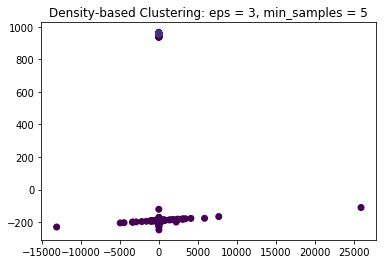

Density-based Clustering: eps = 3, min_samples = 6
Rand index = 0.5000086850790342
Clustering F1 = 0.43955821973651865
Clustering Purity = 0.5166666666666667


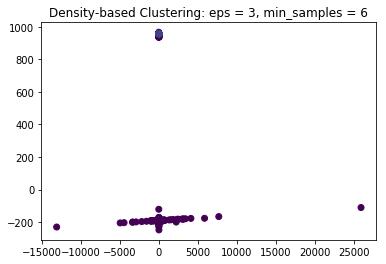

Density-based Clustering: eps = 4, min_samples = 3
Rand index = 0.5008098836199409
Clustering F1 = 0.40579839371442233
Clustering Purity = 0.546875


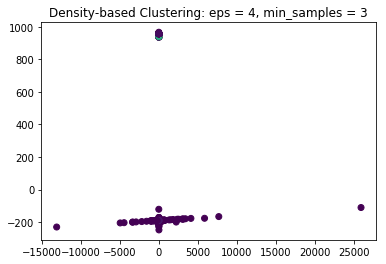

Density-based Clustering: eps = 4, min_samples = 4
Rand index = 0.5004814790689596
Clustering F1 = 0.41947984685718465
Clustering Purity = 0.5291666666666667


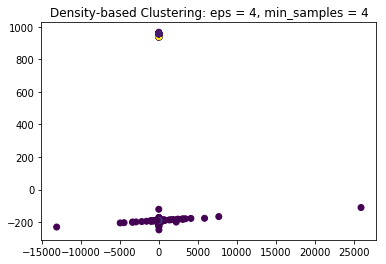

Density-based Clustering: eps = 4, min_samples = 5
Rand index = 0.5003316614556192
Clustering F1 = 0.42442322518681835
Clustering Purity = 0.5244791666666667


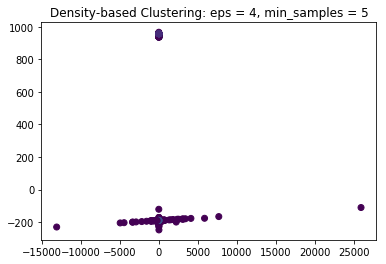

Density-based Clustering: eps = 4, min_samples = 6
Rand index = 0.5002703230849401
Clustering F1 = 0.42727299873836344
Clustering Purity = 0.5203125


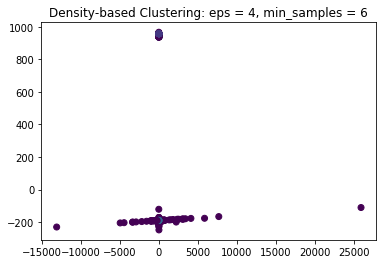

Density-based Clustering: eps = 5, min_samples = 3
Rand index = 0.5003707443112733
Clustering F1 = 0.4356349924122814
Clustering Purity = 0.5364583333333334


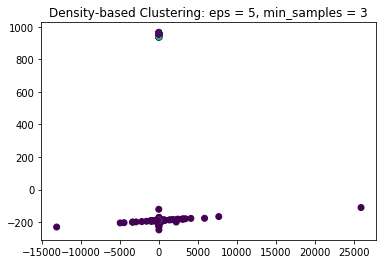

Density-based Clustering: eps = 5, min_samples = 4
Rand index = 0.5001628452318916
Clustering F1 = 0.4430027837158069
Clustering Purity = 0.5239583333333333


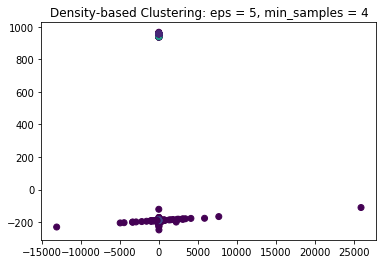

Density-based Clustering: eps = 5, min_samples = 5
Rand index = 0.5001514460656592
Clustering F1 = 0.43503602343931663
Clustering Purity = 0.5239583333333333


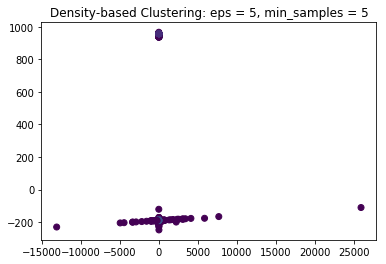

Density-based Clustering: eps = 5, min_samples = 6
Rand index = 0.5001302761855133
Clustering F1 = 0.43623066496717955
Clustering Purity = 0.5223958333333333


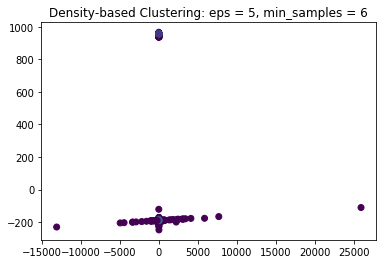

Density-based Clustering: eps = 6, min_samples = 3
Rand index = 0.5004901641479937
Clustering F1 = 0.4482142246809541
Clustering Purity = 0.5390625


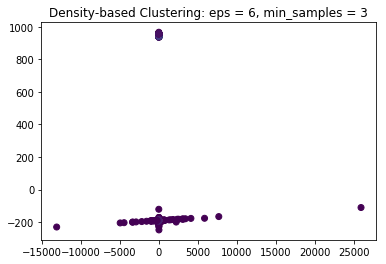

Density-based Clustering: eps = 6, min_samples = 4
Rand index = 0.5002648949105437
Clustering F1 = 0.45180897939740383
Clustering Purity = 0.5276041666666667


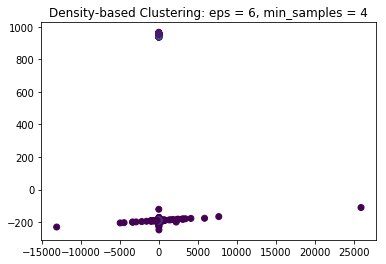

Density-based Clustering: eps = 6, min_samples = 5
Rand index = 0.5002279833246482
Clustering F1 = 0.45427128887287194
Clustering Purity = 0.5239583333333333


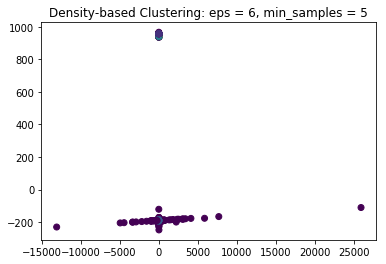

Density-based Clustering: eps = 6, min_samples = 6
Rand index = 0.5002556670140699
Clustering F1 = 0.45275915135224776
Clustering Purity = 0.5234375


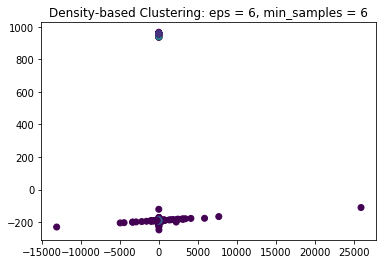

In [106]:
#Perform density based clustering and evaluate performance

for eps_value in range(3, 7):
    for min_samples_value in range(3, 7):
        # DBSCAN
        y_pred = Densitybasedclustering(X, eps_value, min_samples_value)

        rand_index, F1, purity = clustering_metrics(y, y_pred)
        
        print('Density-based Clustering: eps = ' + str(eps_value) + ', min_samples = '+ str(min_samples_value))
        print('Rand index =', rand_index)
        print('Clustering F1 =', F1)
        print('Clustering Purity =', purity)

        plotcluster(X, y_pred, 'Density-based Clustering: eps = ' + str(eps_value) + ', min_samples = '+ str(min_samples_value))

In [107]:
test_data = pd.read_csv('test_data.csv', sep=",")

In [108]:
test_data.columns

Index(['Name', 'Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       '5Y Dividend per Share Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector'],
      dtype='object', length=223)

In [109]:
new_test_data = test_data[['Sector', 'Debt Growth', 'Book Value per Share Growth', 'Asset Growth', '3Y Shareholders Equity Growth (per Share)', '5Y Shareholders Equity Growth (per Share)', '3Y Net Income Growth (per Share)', '5Y Net Income Growth (per Share)', '3Y Operating CF Growth (per Share)', '5Y Operating CF Growth (per Share)', '3Y Revenue Growth (per Share)', '5Y Revenue Growth (per Share)', 'Free Cash Flow growth', 'Operating Cash Flow growth', 'Operating Income Growth', 'EBIT Growth', 'Gross Profit Growth', 'ROE', 'ROIC', 'Income Quality', 'Interest Coverage', 'currentRatio', 'Revenue Growth']]

In [110]:
new_test_data.replace(sector_dict, inplace = True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/pandas/core/generic.py:3466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


In [111]:
new_test_data = new_test_data.fillna(test_data.mean())

In [117]:
predicted_completion2 = Kmeansclustering(new_test_data, 4)

In [118]:
print(predicted_completion2[:500])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [114]:
test_data_name = test_data['Name'].values

In [115]:
submission = pd.DataFrame(list(zip(test_data_name, predicted_completion2)), columns = ['Name', 'Class'])

In [116]:
submission[['Name', 'Class']]

,Name,Class
0,VIPS,0
1,WMT,0
2,MDLZ,0
3,MO,0
4,TAL,0
5,NWL,0
6,TGT,0
7,HRL,0
8,PEP,0
9,COTY,0


In [86]:
submission.to_csv('ds310_submission_knn.csv')